In [37]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

For two-class problem, the Gini index is defined as 

$$
L_{\text{gini}} = 2p(1 - p)
$$

where $p$ is the probability of class 1.

The entropy is defined as

$$
L_{\text{entropy}} = - p \log p - (1 - p)\log(1 - p)
$$

# Visualization

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [38]:
def gini(p: np.ndarray) -> float:
    return 2 * p * (1 - p)

def entropy(p: np.ndarray) -> float:
    return - p * np.log(p) - (1 - p) * np.log(1 - p)

In [32]:
df = pd.DataFrame(np.linspace(1e-6, 1 - 1e-6, 50), columns=["prob"]).assign(
    gini=lambda df: gini(df.prob),
    entroy=lambda df: entropy(df.prob),
)

[Text(0.5, 0, '$p$'), Text(0, 0.5, 'Loss')]

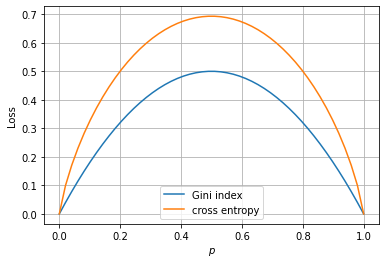

In [36]:
fig, ax = plt.subplots(1, 1)

ax.plot(df['prob'], df['gini'], label='Gini index')
ax.plot(df['prob'], df['entroy'], label='entropy')

ax.grid()
ax.legend()
ax.set(xlabel='$p$', ylabel='Loss')

As seen, entropy is always higher than Gini index, not considering when $p \in \{0, 1\}$.

# Generalization to more than two classes

**Gini index for $K$ classes** can be written as

\begin{align}
L_{\text{gini}}
&=\sum_{k=1}^K p_k \left( \sum_{\substack{k'=1 \\ k'\neq k}}^K p_{k'} \right ) \\
&=\sum_{k=1}^K p_k \left( 1 - p_k \right ) \\
&=\sum_{k=1}^K p_k - p_k^2 \\
&= 1 - \sum_{k=1}^K p_k^2 \\
\end{align}

The Gini index can be interpreted in two ways

1. training error rate: if the example if of class $k$ with probability $p_k$, but it's labeled as not $k$ ( $1 - p_k$ ).
2. consider that "the example is of class $k$" being a random variable, then Gini index is the sum of variance over all $k$.

Ref: see Page 310 on https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf (where entropy is named cross-entropy (by mistake, I suppose)).

**Entropy for $K$ classes** can be written as

\begin{align*}
L_{\text{entropy}}
&= - \sum_{k=1}^K p_k \log p_k \\
\end{align*}


Note, *entropy* isn't exactly the same as how *log-likelihood* is defined, the latter uses a label (0 or 1) instead of a probability. See https://github.com/zyxue/sutton-barto-rl-exercises/blob/master/supervised/derive-linear-poisson-and-logistic-regression.ipynb for calculation of log-likelihood when derving logistic regression.


(<span style="color:red">TODO: still needs to figure out the diff/relationship between the two</span>)